In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

# 모델에 맞게 데이터 가공
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_reshaped = x_train_norm.reshape(-1, x_train_norm.shape[1]*x_train_norm.shape[2])
x_test_reshaped = x_test_norm.reshape(-1, x_test_norm.shape[1]*x_test_norm.shape[2])

# 딥러닝 모델 구성 - 2 Layer Perceptron
model=keras.models.Sequential()
model.add(keras.layers.Dense(50, activation='sigmoid', input_shape=(784,)))  # 입력층 d=784, 은닉층 레이어 H=50
model.add(keras.layers.Dense(10, activation='softmax'))   # 출력층 레이어 K=10
model.summary()

# 모델 구성과 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=10)

# 모델 테스트 결과
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8373 - accuracy: 0.8009
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2486 - accuracy: 0.9303
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1855 - accuracy: 0.9461
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1536 - accuracy: 0.9554
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1261 - accuracy: 0.9630
Epoc

In [3]:
# 입력층 데이터의 모양(shape)
print(x_train_reshaped.shape)

# 테스트를 위해 x_train_reshaped의 앞 5개의 데이터를 가져온다.
X = x_train_reshaped[:5]
print(X.shape)

(60000, 784)
(5, 784)


In [4]:
weight_init_std = 0.1
input_size = 784
hidden_size=50

# 인접 레이어간 관계를 나타내는 파라미터 W를 생성하고 random 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)  
# 바이어스 파라미터 b를 생성하고 Zero로 초기화
b1 = np.zeros(hidden_size)

a1 = np.dot(X, W1) + b1   # 은닉층 출력

print(W1.shape)
print(b1.shape)
print(a1.shape)

(784, 50)
(50,)
(5, 50)


In [7]:
# 첫 번째 데이터의 은닉층 출력을 확인해 봅시다.  50dim의 벡터가 나오나요?
print(a1[0])
print(len(a1[0]))

[-0.70916979 -0.43533804 -0.51893383  1.00747058 -1.23814489 -0.80927324
 -0.18438061  0.67071891  1.83520727  0.50981125  1.1875244  -1.64850651
 -1.87480913 -0.61546978 -0.66528642 -0.10461755  0.87900268 -0.02006646
 -0.99660738  1.31686243  0.41799674 -0.9840424   1.4229379  -2.80908555
 -0.78659046  0.93838617 -0.01812414  1.64684328 -0.04336779 -0.59033015
  0.12900235  0.81855484  0.33203853  0.22165999  1.28508114 -0.78018479
 -0.23228365 -1.05064409  0.62795861  0.2941044  -0.09777943 -0.28782125
  0.31327179 -0.89649993 -0.67288956  0.45359134 -1.04801432  0.4066833
  0.14683891  0.14515769]
50


### 활성화 함수

In [8]:
# 위 수식의 sigmoid 함수를 구현해 봅니다.
#sigmoid

def sigmoid(x):
    return 1 / (1 + np.exp(-x))  


z1 = sigmoid(a1)
print(z1[0])  # sigmoid의 출력은 모든 element가 0에서 1사이

[0.32978231 0.39285238 0.37310157 0.73252485 0.22475906 0.30804539
 0.45403499 0.66166412 0.86238089 0.62476223 0.76629801 0.1613109
 0.13298625 0.35081248 0.33955309 0.47386944 0.70661551 0.49498355
 0.26960897 0.78865922 0.60300379 0.27209042 0.80579857 0.05683518
 0.31290123 0.71877356 0.49546909 0.83846395 0.48915975 0.35655911
 0.53220594 0.69392949 0.5822553  0.55518922 0.78331346 0.31428006
 0.44218879 0.25910144 0.65202644 0.57300066 0.4755746  0.42853734
 0.57768367 0.28977029 0.33785012 0.61149277 0.25960659 0.60029233
 0.53664391 0.53622584]


In [9]:
# 단일 레이어 구현 함수
def affine_layer_forward(X, W, b):
    y = np.dot(X, W) + b
    cache = (X, W, b)
    return y, cache

print('go~')

go~


In [10]:
input_size = 784
hidden_size = 50
output_size = 10

W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)    # z1이 다시 두번째 레이어의 입력이 됩니다. 

print(a2[0])  # 최종 출력이 output_size만큼의 벡터가 되었습니다.

[ 0.35613491  0.29041728 -0.35651378 -0.28962421 -0.25472611  0.06291673
  0.16864742  0.2340253  -0.00531681 -0.24434775]


In [11]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

y_hat = softmax(a2)
y_hat[0]  # 10개의 숫자 중 하나일 확률이 되었습니다.

array([0.13890726, 0.13007209, 0.0681123 , 0.07282413, 0.07541042,
       0.10360528, 0.1151596 , 0.12294006, 0.09677172, 0.07619713])

### 손실함수

In [12]:
# 정답 라벨을 One-hot 인코딩하는 함수
def _change_ont_hot_label(X, num_category):
    T = np.zeros((X.size, num_category))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T

Y_digit = y_train[:5]
t = _change_ont_hot_label(Y_digit, 10)
t     # 정답 라벨의 One-hot 인코딩

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [13]:
print(y_hat[0])
print(t[0])

[0.13890726 0.13007209 0.0681123  0.07282413 0.07541042 0.10360528
 0.1151596  0.12294006 0.09677172 0.07619713]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [14]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

Loss = cross_entropy_error(y_hat, t)
Loss

2.236484982277505

### 경사하강법

In [15]:
batch_num = y_hat.shape[0]
dy = (y_hat - t) / batch_num
dy    # softmax값의 출력으로 Loss를 미분한 값

array([[ 0.02778145,  0.02601442,  0.01362246,  0.01456483,  0.01508208,
        -0.17927894,  0.02303192,  0.02458801,  0.01935434,  0.01523943],
       [-0.16826155,  0.02827855,  0.01675238,  0.01424815,  0.01493542,
         0.02130501,  0.01937894,  0.02272358,  0.01838565,  0.01225389],
       [ 0.02847369,  0.03106365,  0.01721484,  0.01284636, -0.18509239,
         0.02291302,  0.0160954 ,  0.0219799 ,  0.01978986,  0.01471568],
       [ 0.02771247, -0.16726373,  0.01682962,  0.01422256,  0.01290406,
         0.02450264,  0.01620085,  0.0234418 ,  0.01638521,  0.01506452],
       [ 0.03104073,  0.03236271,  0.01640946,  0.01475841,  0.01447212,
         0.02165673,  0.01673618,  0.02229091,  0.01639722, -0.18612446]])

In [16]:
dW2 = np.dot(z1.T, dy)    
dW2

array([[-7.16467433e-02, -2.08304104e-02,  4.01855244e-02,
         3.42015666e-02, -8.39446335e-02, -1.98203087e-03,
         4.38852267e-02,  5.57166607e-02,  4.42985339e-02,
        -3.98836941e-02],
       [-6.55885572e-03, -5.02063949e-02,  5.09252604e-02,
         4.54158269e-02, -6.15370919e-02, -1.11169886e-01,
         5.99181188e-02,  7.43697428e-02,  5.80188687e-02,
        -5.91755896e-02],
       [-1.15805427e-02, -4.43681366e-02,  2.40206473e-02,
         2.08905102e-02, -6.02022834e-03,  9.22068080e-03,
         2.55803659e-02,  3.34126650e-02,  2.52847027e-02,
        -7.64406643e-02],
       [-6.78230413e-02, -5.07301445e-02,  5.27005479e-02,
         4.53268806e-02, -8.33336724e-02, -1.29214579e-02,
         5.78280452e-02,  7.36610652e-02,  5.77921224e-02,
        -7.25003450e-02],
       [-6.53418015e-02, -8.68364384e-03,  5.62597946e-02,
         4.83153314e-02, -1.16559535e-01, -1.95183234e-02,
         6.19155459e-02,  7.84694493e-02,  6.22554058e-02,
        -9.

In [17]:
dW2 = np.dot(z1.T, dy)
db2 = np.sum(dy, axis=0)

In [18]:
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [19]:
dz1 = np.dot(dy, W2.T)
da1 = sigmoid_grad(a1) * dz1
dW1 = np.dot(X.T, da1)
db1 = np.sum(dz1, axis=0)

In [20]:
learning_rate = 0.1

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    return W1, b1, W2, b2

### 오차역전파법

In [21]:
def affine_layer_backward(dy, cache):
    X, W, b = cache
    dX = np.dot(dy, W.T)
    dW = np.dot(X.T, dy)
    db = np.sum(dy, axis=0)
    return dX, dW, db

In [22]:
# 파라미터 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

# Forward Propagation
a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)

# 추론과 오차(Loss) 계산
y_hat = softmax(a2)
t = _change_ont_hot_label(Y_digit, 10)   # 정답 One-hot 인코딩
Loss = cross_entropy_error(y_hat, t)

print(y_hat)
print(t)
print('Loss: ', Loss)
        
dy = (y_hat - t) / X.shape[0]
dz1, dW2, db2 = affine_layer_backward(dy, cache2)
da1 = sigmoid_grad(a1) * dz1
dX, dW1, db1 = affine_layer_backward(da1, cache1)

# 경사하강법을 통한 파라미터 업데이트    
learning_rate = 0.1
W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

[[0.16252368 0.10894961 0.07281728 0.0721107  0.11121353 0.08531475
  0.05475111 0.10258691 0.13417527 0.09555717]
 [0.14131703 0.10031967 0.07072047 0.06786114 0.11576951 0.07770776
  0.0746206  0.10262199 0.13850323 0.1105586 ]
 [0.11048367 0.1111231  0.07717137 0.07975173 0.09775841 0.10350289
  0.06208648 0.11075979 0.14850005 0.0988625 ]
 [0.15796702 0.09447435 0.07696161 0.0834587  0.10814065 0.07267045
  0.07197904 0.11460159 0.10635862 0.11338797]
 [0.15422967 0.11062182 0.08202747 0.08798496 0.11165148 0.07908497
  0.06494694 0.10655348 0.11859248 0.08430672]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.315226794497036


# 모델 학습
- step by step
- 모델이 추론한 확률값 y_hat이 정답의 One-hot 인코딩 t값에 조금씩 근접하는 것과, Loss가 점점 감소하는 것이 확인할 수 있음.

In [23]:
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

def train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=False):
    a1, cache1 = affine_layer_forward(X, W1, b1)
    z1 = sigmoid(a1)
    a2, cache2 = affine_layer_forward(z1, W2, b2)
    y_hat = softmax(a2)
    t = _change_ont_hot_label(Y, 10)
    Loss = cross_entropy_error(y_hat, t)

    if verbose:
        print('---------')
        print(y_hat)
        print(t)
        print('Loss: ', Loss)
        
    dy = (y_hat - t) / X.shape[0]
    dz1, dW2, db2 = affine_layer_backward(dy, cache2)
    da1 = sigmoid_grad(a1) * dz1
    dX, dW1, db1 = affine_layer_backward(da1, cache1)
    
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    return W1, b1, W2, b2, Loss

In [24]:
X = x_train_reshaped[:5]
Y = y_train[:5]

# train_step을 다섯 번 반복 돌립니다.
for i in range(5):
    W1, b1, W2, b2, _ = train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=True)

---------
[[0.14990769 0.10336186 0.08423363 0.10200554 0.07046756 0.10213582
  0.15786897 0.06642947 0.06134857 0.10224089]
 [0.1537431  0.10984183 0.07988543 0.09636192 0.06914142 0.09640549
  0.14945045 0.06967342 0.06181267 0.11368428]
 [0.14114866 0.10153984 0.09007459 0.08625202 0.07136968 0.102309
  0.14239581 0.0681125  0.06846929 0.1283286 ]
 [0.1634132  0.1066733  0.07245096 0.10534223 0.0702653  0.10045906
  0.13819377 0.0648595  0.06927508 0.10906759]
 [0.15269585 0.10859548 0.08712676 0.09483573 0.0665585  0.07646838
  0.16239912 0.06940194 0.06463509 0.11728315]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.2349909397895678
---------
[[0.15898588 0.11597053 0.07431168 0.08771297 0.08337124 0.12376161
  0.12627677 0.05969233 0.05574249 0.11417449]
 [0.1684658  0.12269592 0.06976019 0.08275977 0.08039473 0.11194552
  0.11998486 0.0624721  0.05575

# 추론과정 구현, 정확도(Accuracy) 계산

In [25]:
def predict(W1, b1, W2, b2, X):
    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

In [26]:
# X = x_train[:100] 에 대해 모델 추론을 시도합니다. 
X = x_train_reshaped[:100]
Y = y_test[:100]
result = predict(W1, b1, W2, b2, X)
result[0]

array([0.16906207, 0.14034263, 0.04547632, 0.05065816, 0.12342135,
       0.19774785, 0.06381557, 0.03787551, 0.03614893, 0.13545162])

In [27]:
def accuracy(W1, b1, W2, b2, x, y):
    y_hat = predict(W1, b1, W2, b2, x)
    y_hat = np.argmax(y_hat, axis=1)

    accuracy = np.sum(y_hat == y) / float(x.shape[0])
    return accuracy

In [28]:
#추론한 결과의 정확도가 얼마나 될지 계산하기.

acc = accuracy(W1, b1, W2, b2, X, Y)

t = _change_ont_hot_label(Y, 10)
print(result[0])
print(t[0])
print(acc)

[0.16906207 0.14034263 0.04547632 0.05065816 0.12342135 0.19774785
 0.06381557 0.03787551 0.03614893 0.13545162]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
0.07


# 전체 학습 사이클 수행

In [29]:
# 학습 시킬 파라미터들을 초기화하는 함수

def init_params(input_size, hidden_size, output_size, weight_init_std=0.01):

    W1 = weight_init_std * np.random.randn(input_size, hidden_size)
    b1 = np.zeros(hidden_size)
    W2 = weight_init_std * np.random.randn(hidden_size, output_size)
    b2 = np.zeros(output_size)

    print(W1.shape)
    print(b1.shape)
    print(W2.shape)
    print(b2.shape)
    
    return W1, b1, W2, b2

In [30]:
#numpy는 GPU를 지원하지 않음.
#CPU만 사용하여 수행

# 하이퍼파라미터
iters_num = 50000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

W1, b1, W2, b2 = init_params(784, 50, 10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train_reshaped[batch_mask]
    y_batch = y_train[batch_mask]
    
    W1, b1, W2, b2, Loss = train_step(x_batch, y_batch, W1, b1, W2, b2, learning_rate=0.1, verbose=False)

    # 학습 경과 기록
    train_loss_list.append(Loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        print('Loss: ', Loss)
        train_acc = accuracy(W1, b1, W2, b2, x_train_reshaped, y_train)
        test_acc = accuracy(W1, b1, W2, b2, x_test_reshaped, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

(784, 50)
(50,)
(50, 10)
(10,)
Loss:  2.295159847815097
train acc, test acc | 0.11566666666666667, 0.1179
Loss:  0.923082103862043
train acc, test acc | 0.7744, 0.7817
Loss:  0.45882294585479444
train acc, test acc | 0.8745666666666667, 0.8796
Loss:  0.3188072659778752
train acc, test acc | 0.8984, 0.9018
Loss:  0.35734350056691816
train acc, test acc | 0.9072166666666667, 0.9114
Loss:  0.24408670300385896
train acc, test acc | 0.9144, 0.9178
Loss:  0.33355415099229396
train acc, test acc | 0.9193666666666667, 0.9219
Loss:  0.16766129754014092
train acc, test acc | 0.9243833333333333, 0.927
Loss:  0.2561399824931198
train acc, test acc | 0.9273333333333333, 0.9299
Loss:  0.1823225331507311
train acc, test acc | 0.9314333333333333, 0.9333
Loss:  0.1569989953886176
train acc, test acc | 0.9338833333333333, 0.936
Loss:  0.23000379027689744
train acc, test acc | 0.9374166666666667, 0.9386
Loss:  0.16704925088366007
train acc, test acc | 0.9392166666666667, 0.9395
Loss:  0.13401786737384097

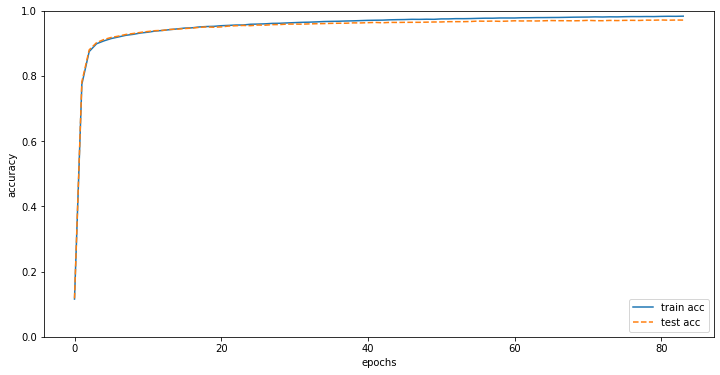

In [31]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6 

# Accuracy 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

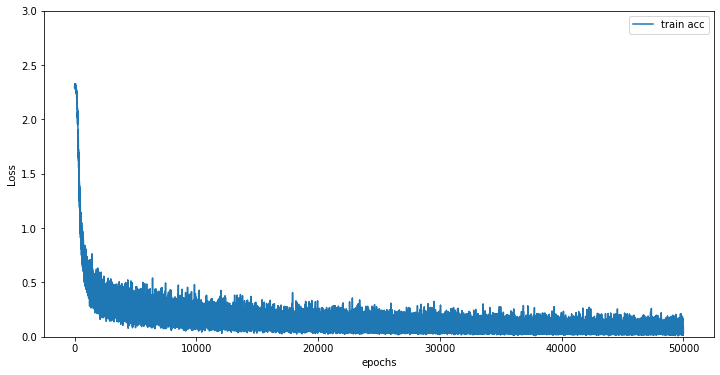

In [32]:
# Loss 그래프 그리기
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train acc')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.ylim(0, 3.0)
plt.legend(loc='best')
plt.show()